In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import cool
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/nfl_data.csv')
#new

<ipython-input-3-e2a2e2ef5531>:1: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/nfl_data.csv')


In [4]:
df.columns

Index(['game_id', 'player_id', 'pos', 'player', 'team', 'pass_cmp', 'pass_att',
       'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds',
       'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td',
       'rush_long', 'targets', 'rec', 'rec_yds', 'rec_td', 'rec_long',
       'fumbles_lost', 'rush_scrambles', 'designed_rush_att',
       'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play',
       'Team_abbrev', 'Opponent_abbrev', 'two_point_conv', 'total_ret_td',
       'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus',
       'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'Total_FDP', 'Off_FDP',
       'Total_SDP', 'Off_SDP', 'pass_target_yds', 'pass_poor_throws',
       'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac',
       'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense',
       'off_pct', 'vis_team', 'home_team', 'vis_score', 'home_score', 'OT',
       'Roof', 'Surface', 'Temperature', 'Humidit

In [5]:
df.head()

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0


**objective 1**

**linear regression**

In [7]:




# Extract features and target variable
X = df['pass_long'].values.reshape(-1,1)
y = df['targets'].values.reshape(-1,1)
scaler=StandardScaler()
X = scaler.fit_transform(X)
# Split the df into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared score: ", r2score)
print("Mean squared error: ", mse)


R-squared score:  0.05766947029472136
Mean squared error:  9.280594315276726


**clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-83d3f2b0760b>:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


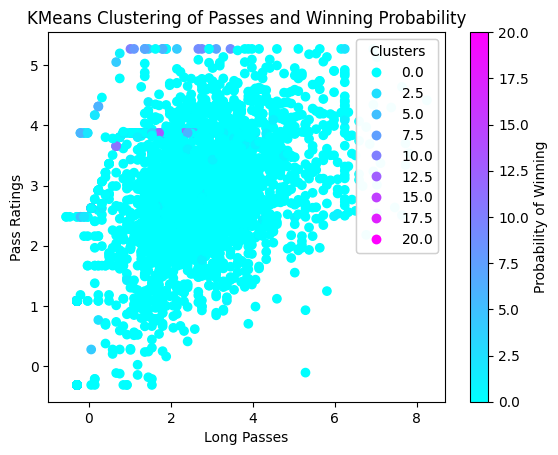

In [8]:

# Select relevant columns
X = df[['pass_long','pass_rating','targets']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster df
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Visualize clusters with color indicating probability of winning
fig, ax = plt.subplots()
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['targets'], cmap=cool)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel("Long Passes")
plt.ylabel("Pass Ratings")
plt.title("KMeans Clustering of Passes and Winning Probability")
sm = plt.cm.ScalarMappable(cmap=cool, norm=plt.Normalize(vmin=df['targets'].min(), vmax=df['targets'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('Probability of Winning')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


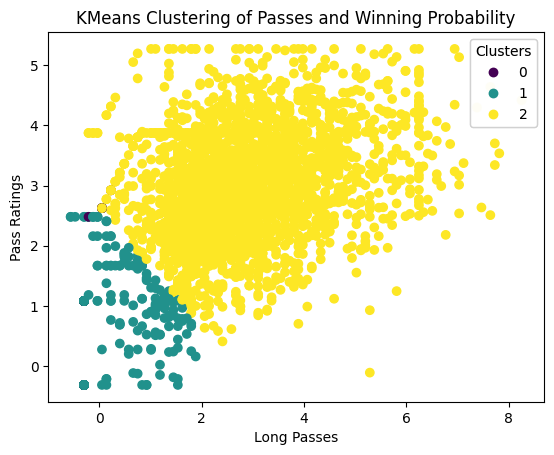

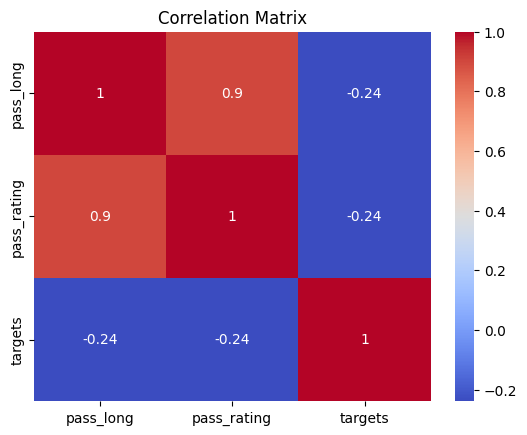

In [9]:


# Load data


# Select relevant columns
X = df[['pass_long','pass_rating','targets']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Visualize clusters
fig, ax = plt.subplots()
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel("Long Passes")
plt.ylabel("Pass Ratings")
plt.title("KMeans Clustering of Passes and Winning Probability")
plt.show()
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**random forest**

In [10]:


# load the dfset

# select the relevant features
features = ['pass_long','pass_rating']
X = df[features]
y = df['targets']

# split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# fit the model to the training df
rf_model.fit(X_train, y_train)

# make predictions on the testing df
y_pred = rf_model.predict(X_test)

# evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 9.14496699765641
R-squared: 0.07144076098084473


**decision tree**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


R-squared score:  -0.7160831580362435
Mean squared error:  16.90093984962406


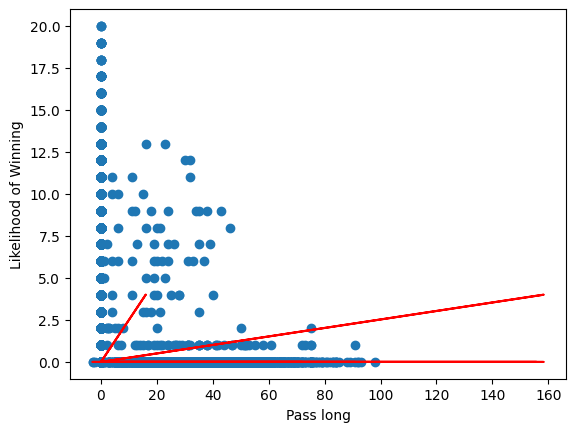

In [11]:




# extract the features and target variable
X = df[['pass_long','pass_rating']]
y = df['targets'].values
d=df[['targets','home_team']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor=DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}
regressor.fit(X_train, y_train)
regressor = GridSearchCV(regressor, param_grid, cv=5)

# Train the grid search object on the data
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: ", r2score)
print("Mean squared error: ", mse)



# create scatter plot and regression line
plt.scatter(X['pass_long'], y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Pass long')
plt.ylabel('Likelihood of Winning')
plt.show()




In [12]:
X

,pass_long,pass_rating
0,47,91.4
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
26595,0,0.0
26596,0,0.0
26597,0,0.0
26598,0,0.0


**objective 2**

**linear regression**

In [13]:




# Extract features and target variable
X = df['pass_rating'].values.reshape(-1,1)
y = df['targets'].values.reshape(-1,1)
X = scaler.fit_transform(X)
# Split the df into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared score: ", r2score)
print("Mean squared error: ", mse)


R-squared score:  0.05673771931382632
Mean squared error:  9.289770716320692


**decision tree**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


R-squared score:  -0.7169992879794744
Mean squared error:  16.909962406015037


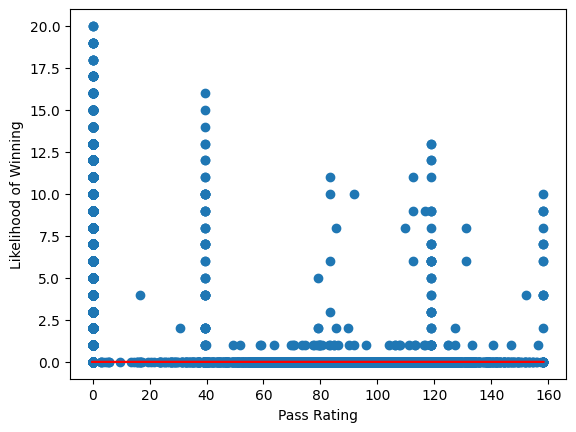

In [14]:




# extract the features and target variable
X = df[['pass_rating']]
y = df['targets'].values
d=df[['targets','pass_rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor=DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}
regressor.fit(X_train, y_train)
regressor = GridSearchCV(regressor, param_grid, cv=5)

# Train the grid search object on the data
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: ", r2score)
print("Mean squared error: ", mse)



# create scatter plot and regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Pass Rating')
plt.ylabel('Likelihood of Winning')
plt.show()




k means clustering 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


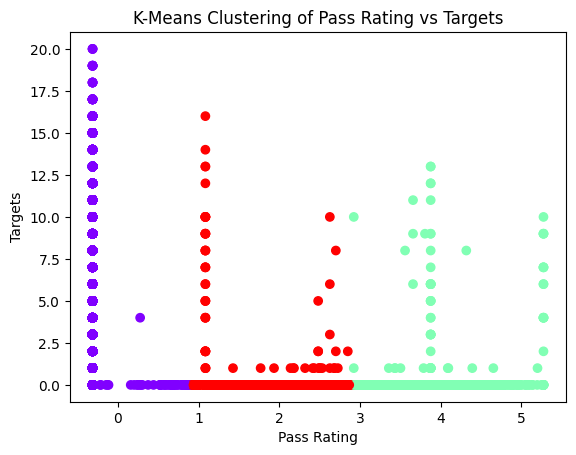

In [15]:

# Perform k-means clustering with 3 clusters
X = df['pass_rating'].values.reshape(-1,1)
y = df['targets'].values.reshape(-1,1)
X = scaler.fit_transform(X)
# Split the df into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)

# Visualize the clusters
plt.scatter(X_train[:,0], y_train[:,0], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Pass Rating')
plt.ylabel('Targets')
plt.title('K-Means Clustering of Pass Rating vs Targets')
plt.show()


**linear regression**

R-squared score:  0.05673771931382632
Mean squared error:  9.289770716320692
Coefficients:  [-0.02706552]
Pearson correlation coefficient:  -0.2379495872482835
Spearman correlation coefficient:  -0.3505015542905309


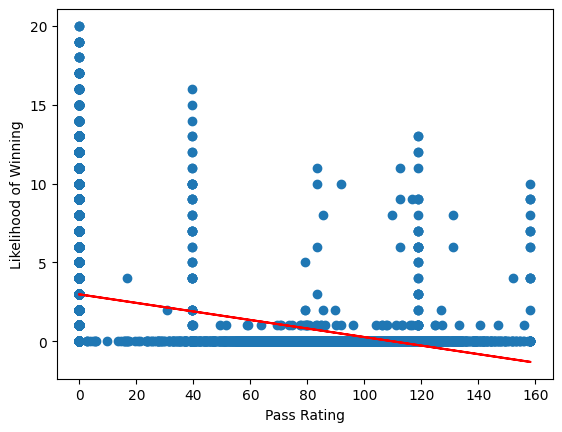

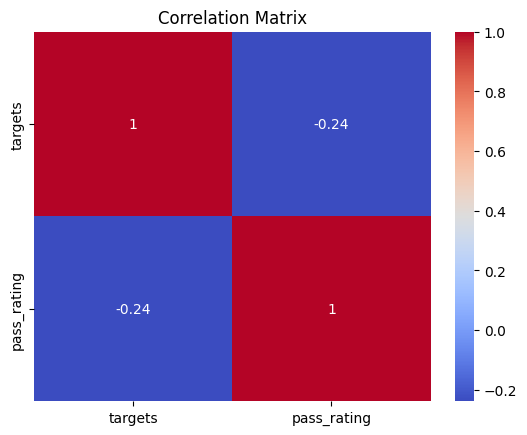

In [16]:

# extract the features and target variable
X = df['pass_rating'].values.reshape(-1, 1)
y = df['targets'].values
d=df[['targets','pass_rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: ", r2score)
print("Mean squared error: ", mse)

# print the coefficients
print('Coefficients: ', regressor.coef_)

# calculate correlation coefficients
pearson_coef, _ = pearsonr(X.flatten(), y)
spearman_coef, _ = spearmanr(X.flatten(), y)
print('Pearson correlation coefficient: ', pearson_coef)
print('Spearman correlation coefficient: ', spearman_coef)

# create scatter plot and regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Pass Rating')
plt.ylabel('Likelihood of Winning')
plt.show()

# create heatmap to visualize correlation matrix
corr_matrix = d.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-248d36d0352d>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


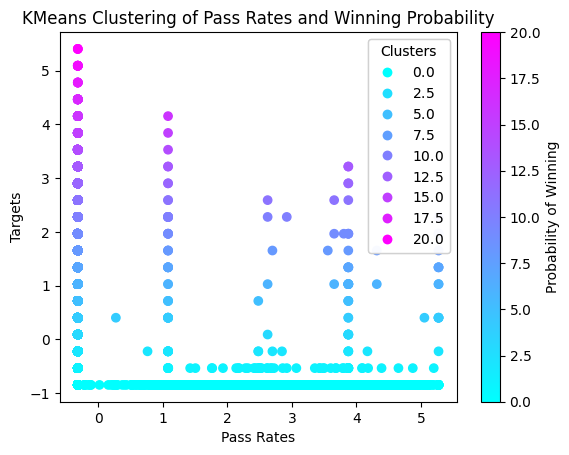

In [17]:


# Select relevant columns
X = df[['pass_rating', 'targets']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster df
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Visualize clusters with color indicating probability of winning
fig, ax = plt.subplots()
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['targets'], cmap=cool)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel("Pass Rates")
plt.ylabel("Targets")
plt.title("KMeans Clustering of Pass Rates and Winning Probability")
sm = plt.cm.ScalarMappable(cmap=cool, norm=plt.Normalize(vmin=df['targets'].min(), vmax=df['targets'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('Probability of Winning')
plt.show()


objective 3

**objective 3**

In [18]:


df['home_team'] = le.fit_transform(df['home_team'])

**linear regression**

R-squared score:  -0.000360379400739852
Mean squared error:  9.852104497981404
Coefficients:  [0.00261207]
Pearson correlation coefficient:  0.0093385262704158
Spearman correlation coefficient:  0.011232940138976718


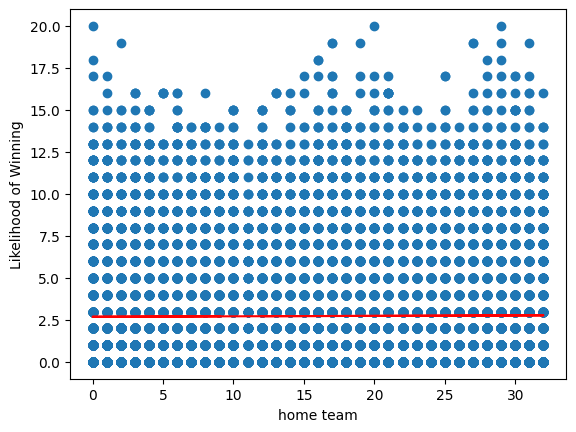

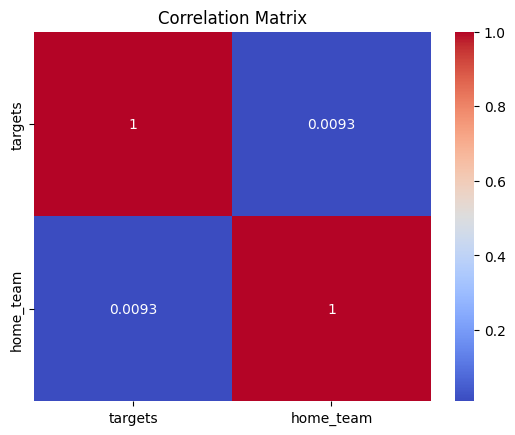

In [19]:



# extract the features and target variable
X = df['home_team'].values.reshape(-1, 1)
y = df['targets'].values
d=df[['targets','home_team']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: ", r2score)
print("Mean squared error: ", mse)




# print the coefficients
print('Coefficients: ', regressor.coef_)

# calculate correlation coefficients
pearson_coef, _ = pearsonr(X.flatten(), y)
spearman_coef, _ = spearmanr(X.flatten(), y)
print('Pearson correlation coefficient: ', pearson_coef)
print('Spearman correlation coefficient: ', spearman_coef)

# create scatter plot and regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('home team')
plt.ylabel('Likelihood of Winning')
plt.show()

# create heatmap to visualize correlation matrix
corr_matrix = d.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**decision tree**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


R-squared score:  -0.7169992879794744
Mean squared error:  16.909962406015037


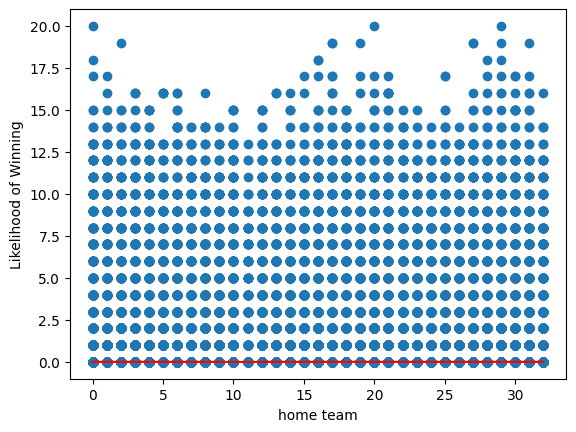

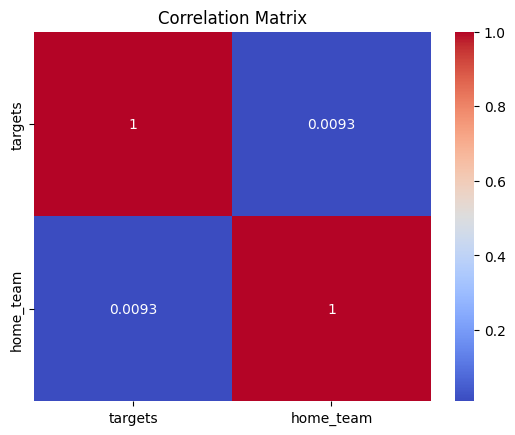

In [20]:
# extract the features and target variable
X = df['home_team'].values.reshape(-1, 1)
y = df['targets'].values
d=df[['targets','home_team']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor=DecisionTreeClassifier(random_state=42)
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}
regressor.fit(X_train, y_train)
regressor = GridSearchCV(regressor, param_grid, cv=5)

# Train the grid search object on the data
regressor.fit(X_train, y_train)

# Evaluate the regressor
from sklearn.metrics import r2_score, mean_squared_error
y_pred = regressor.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: ", r2score)
print("Mean squared error: ", mse)



# create scatter plot and regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('home team')
plt.ylabel('Likelihood of Winning')
plt.show()

# create heatmap to visualize correlation matrix
corr_matrix = d.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


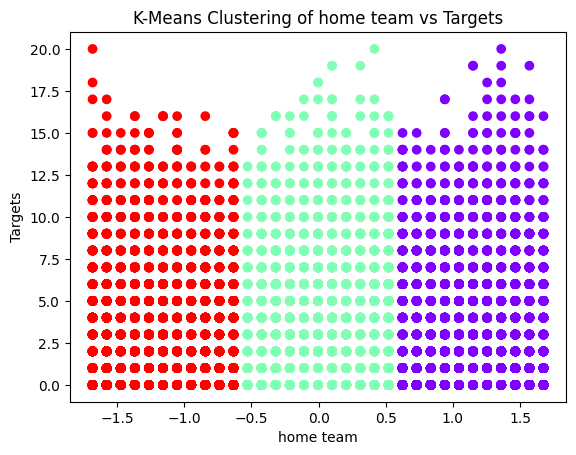

In [21]:

# Perform k-means clustering with 3 clusters
X = df['home_team'].values.reshape(-1,1)
y = df['targets'].values.reshape(-1,1)
X = scaler.fit_transform(X)
# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)

# Visualize the clusters
plt.scatter(X_train[:,0], y_train[:,0], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('home team')
plt.ylabel('Targets')
plt.title('K-Means Clustering of home team vs Targets')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-4d0b420f0d5d>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


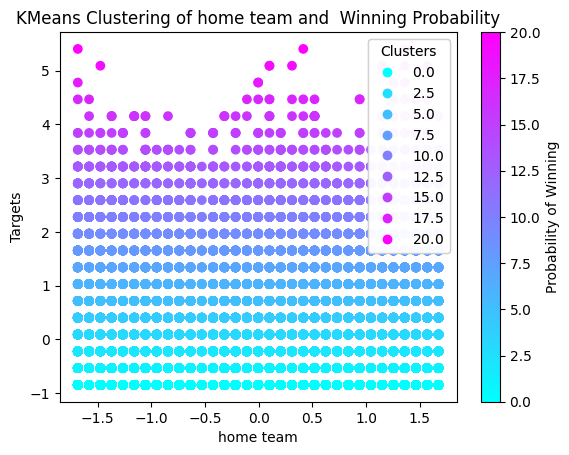

In [22]:

# Select relevant columns
X = df[['home_team', 'targets']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster df
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Visualize clusters with color indicating probability of winning
fig, ax = plt.subplots()
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['targets'], cmap=cool)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel("home team")
plt.ylabel("Targets")
plt.title("KMeans Clustering of home team and  Winning Probability")
sm = plt.cm.ScalarMappable(cmap=cool, norm=plt.Normalize(vmin=df['targets'].min(), vmax=df['targets'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('Probability of Winning')
plt.show()


**objective 4**

**linear regression**

R-squared score:  -0.00025984806920442693
Mean squared error:  9.851114409605252
Coefficients:  [0.22857883]
Pearson correlation coefficient:  0.011249540382669211
Spearman correlation coefficient:  -0.00656484374349399


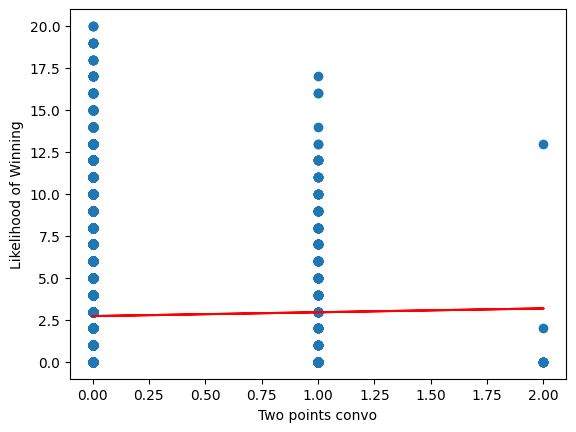

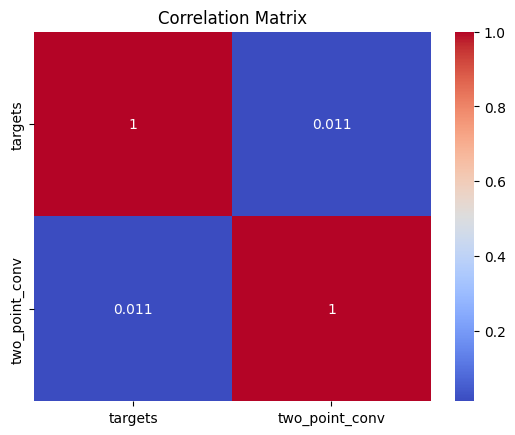

In [23]:



# extract the features and target variable
X = df['two_point_conv'].values.reshape(-1, 1)
y = df['targets'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: ", r2score)
print("Mean squared error: ", mse)

# perform linear regression


# print the coefficients
print('Coefficients: ', regressor.coef_)

# calculate correlation coefficients
pearson_coef, _ = pearsonr(X.flatten(), y)
spearman_coef, _ = spearmanr(X.flatten(), y)
print('Pearson correlation coefficient: ', pearson_coef)
print('Spearman correlation coefficient: ', spearman_coef)

# create scatter plot and regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Two points convo')
plt.ylabel('Likelihood of Winning')
plt.show()
d=df[['targets','two_point_conv']]
# create heatmap to visualize correlation matrix
corr_matrix = d.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**decision tree**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


R-squared score:  -0.7169992879794744
Mean squared error:  16.909962406015037


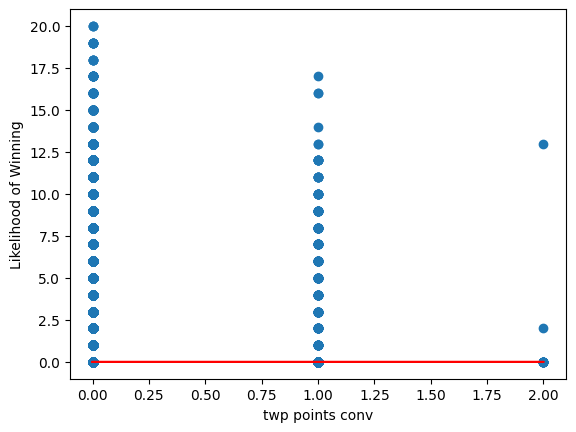

In [24]:




# extract the features and target variable
X = df['two_point_conv'].values.reshape(-1, 1)
y = df['targets'].values
d=df[['targets','home_team']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor=DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}
regressor.fit(X_train, y_train)
regressor = GridSearchCV(regressor, param_grid, cv=5)

# Train the grid search object on the data
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: ", r2score)
print("Mean squared error: ", mse)



# create scatter plot and regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('twp points conv')
plt.ylabel('Likelihood of Winning')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


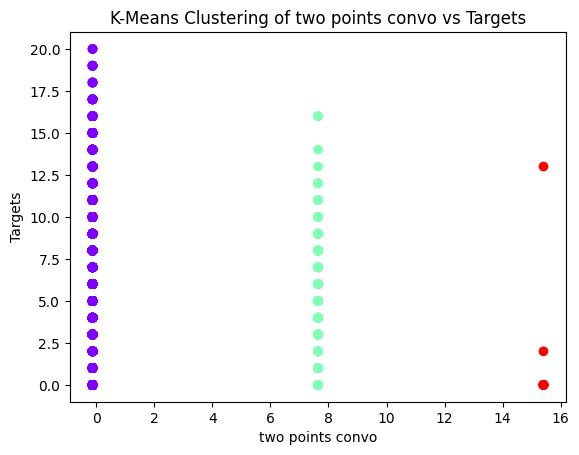

In [25]:

# Perform k-means clustering with 3 clusters
X = df['two_point_conv'].values.reshape(-1,1)
y = df['targets'].values.reshape(-1,1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)

# Visualize the clusters
plt.scatter(X_train[:,0], y_train[:,0], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('two points convo')
plt.ylabel('Targets')
plt.title('K-Means Clustering of two points convo vs Targets')
plt.show()


**clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-d1d5bc92c609>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


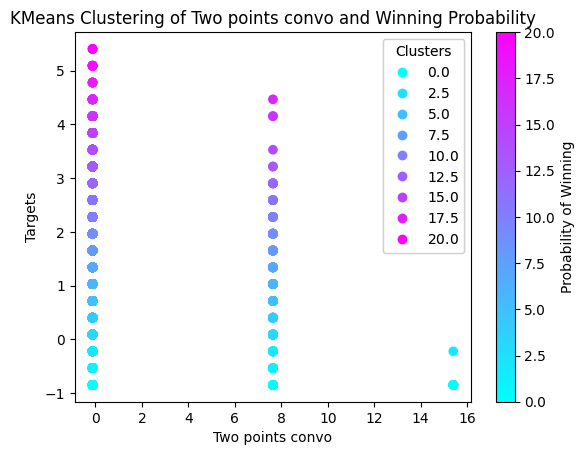

In [26]:


# Select relevant columns
X = df[['two_point_conv', 'targets']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster df
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Visualize clusters with color indicating probability of winning
fig, ax = plt.subplots()
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['targets'], cmap=cool)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel("Two points convo")
plt.ylabel("Targets")
plt.title("KMeans Clustering of Two points convo and Winning Probability")
sm = plt.cm.ScalarMappable(cmap=cool, norm=plt.Normalize(vmin=df['targets'].min(), vmax=df['targets'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('Probability of Winning')
plt.show()
